## Torch helper

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# # Example of target with class indices
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randint(5, (3,), dtype=torch.int64)
# loss = F.cross_entropy(input, target)
# loss.backward()

# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
loss = F.cross_entropy(input, target)
loss.backward()

In [3]:
torch.rand((32,2,24,24)).flatten(start_dim=1).shape

torch.Size([32, 1152])

In [32]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

In [34]:
output

tensor([[0.3184, 0.5187, 0.1629],
        [0.1729, 0.3803, 0.4468]])

In [33]:
input

tensor([[ 0.4528,  0.9407, -0.2173],
        [-0.7126,  0.0754,  0.2365]])

In [35]:
target

tensor([[0.0902, 0.0469, 0.3807, 0.2519, 0.2302],
        [0.2238, 0.0231, 0.1703, 0.4697, 0.1130],
        [0.1024, 0.0231, 0.0521, 0.1747, 0.6477]])

## Data exploration

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path2imgs = 'data/mazes_500k_2corridors_13x13.csv'
df = pd.read_csv(path2imgs, header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,1,1,1,1,1,0,0,1,1,1,...,0,0,0,1,1,1,1,1,5,6
1,1,1,1,1,1,1,0,0,1,1,...,1,0,0,0,1,1,1,1,7,6
2,0,0,0,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,6
3,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,2
4,0,1,0,0,0,0,1,1,1,1,...,1,1,0,1,0,1,1,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,10,0
499996,1,1,1,1,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,6,2
499997,1,1,0,0,0,1,1,1,1,1,...,1,1,1,1,0,0,0,1,2,11
499998,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,1,1,1,1,10,7


In [146]:
l = d[0:4][1]
idx = l[0]*13 + l[1]

In [145]:
idx.shape

torch.Size([])

In [147]:
l[:,0]*13 + l[:,1]

tensor([160,  57, 152,  50])

In [127]:
idx

tensor([160,  57])

In [63]:
a = df[(df.iloc[:, 170] <= df.iloc[:, 169]+1) & (df.iloc[:, 170] >= df.iloc[:, 169]-1)]

In [116]:
df.groupby([169,170]).count()

0     1     2     3     4     5     6     7     8     9    ...  \
169 170                                                              ...   
0   0    1206  1206  1206  1206  1206  1206  1206  1206  1206  1206  ...   
    1    1212  1212  1212  1212  1212  1212  1212  1212  1212  1212  ...   
    2    1085  1085  1085  1085  1085  1085  1085  1085  1085  1085  ...   
    3    1117  1117  1117  1117  1117  1117  1117  1117  1117  1117  ...   
    4    1224  1224  1224  1224  1224  1224  1224  1224  1224  1224  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
12  8    1251  1251  1251  1251  1251  1251  1251  1251  1251  1251  ...   
    9    1174  1174  1174  1174  1174  1174  1174  1174  1174  1174  ...   
    10   1168  1168  1168  1168  1168  1168  1168  1168  1168  1168  ...   
    11   1154  1154  1154  1154  1154  1154  1154  1154  1154  1154  ...   
    12   1132  1132  1132  1132  1132  1132  1132  1132  1132  1132  ...   

          159   160   161   162   163   164   165   166   167   168  
169 170                                                              
0   0    1206  1206  1206  1206  1206  1206  1206  1206  1206  1206  
    1    1212  1212  1212  1212  1212  1212  1212  1212  1212  1212  
    2    1085  1085  1085  1085  1085  1085  1085  1085  1085  1085  
    3    1117  1117  1117  1117  1117  1117  1117  1117  1117  1117  
    4    1224  1224  1224  1224  1224  1224  1224  1224  1224  1224  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
12  8    1251  1251  1251  1251  1251  1251  1251  1251  1251  1251  
    9    1174  1174  1174  1174  1174  1174  1174  1174  1174  1174  
    10   1168  1168  1168  1168  1168  1168  1168  1168  1168  1168  
    11   1154  1154  1154  1154  1154  1154  1154  1154  1154  1154  
    12   1132  1132  1132  1132  1132  1132  1132  1132  1132  1132  

[169 rows x 169 columns]

In [42]:
df[(df.iloc[:,170]>6) & (df.iloc[:,169]>6)]

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
12,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,0,1,10,9
29,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,0,0,8,12
34,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,11,11
38,1,0,1,0,1,1,0,0,0,0,...,1,1,1,1,1,0,0,0,7,11
41,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,0,0,0,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99876,1,1,1,1,1,1,0,0,0,1,...,1,1,1,1,1,1,0,0,7,12
99894,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,0,10,12
99916,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,0,0,12,11
99917,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,11,9


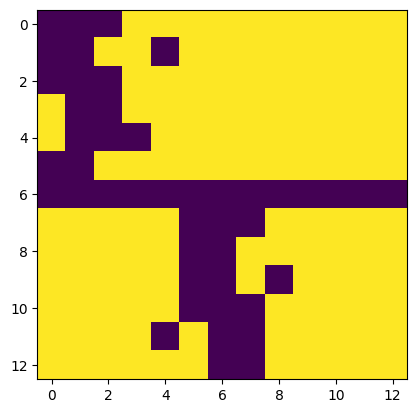

In [5]:
plt.imshow(df.iloc[2, :-2].values.reshape(13,13))

In [6]:
df.iloc[2, -2:]

169    1
170    6
Name: 2, dtype: int64

## Tensorboard


In [ ]:
%load_ext tensorboard

## Trained model

In [1]:
from utils import load_experiment, plot_random_sample

config_file = 'configs/bbvae.yaml'
#config_file = 'logs/BetaVAE_CLF/version_0/hparams.yaml'
ckpt = 'logs/BetaVAE/version_10/checkpoints/last.ckpt'

dataset, model, config = load_experiment(config_file, ckpt)

In [2]:
data = dataset[185160:185175]

### Reconstruction

Sample idx :  186124
Sample labels :  tensor([[3, 3]])


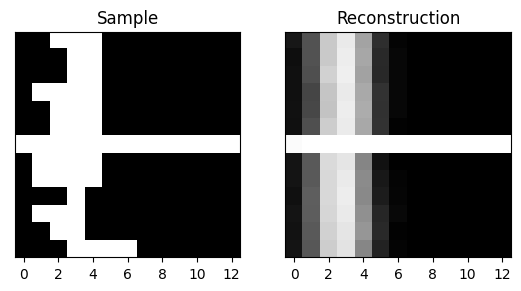

In [2]:
fig, ax = plot_random_sample(dataset, model)

### Classifier (temporary)

In [4]:
import torch
import numpy as np
data = dataset[225_000:250000]
true_l = model.map_label2idx_task0(data[1]).detach().numpy()
mu, log_var = model.encode(data[0])
z = model.reparameterize(mu, log_var)
pred = model.classify(z).squeeze().detach().numpy()
pred = np.argmax(pred, axis=1)

In [7]:
import torch
import numpy as np
data = dataset[185_000:200_000]
true_l = model.map_label2idx_task1(data[1]).detach().numpy()
mu, log_var = model.encode(data[0])
z = model.reparameterize(mu, log_var)
pred = model.classify(z).squeeze().detach().numpy()
pred = np.where(pred>=.5, 1, 0)

In [9]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
print(f'F1 score: {f1_score(true_l, pred, average="weighted")}')

F1 score: 0.9943591292194547


In [ ]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(true_l, pred), annot=False, fmt='d', cmap='Blues')

In [10]:
print(classification_report(true_l, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13854
         1.0       0.95      0.97      0.96      1146

    accuracy                           0.99     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.99      0.99      0.99     15000



In [13]:
np.where(true_l==1)

(array([    3,    13,    20, ..., 14977, 14998, 14999]),
 array([0, 0, 0, ..., 0, 0, 0]))

[1.] 1
Sample idx :  185013
Sample labels :  tensor([[4, 4]])


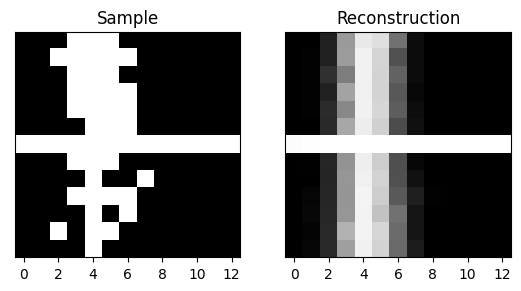

In [18]:
idx = 13
print(true_l[idx], pred[idx])
fig, ax = plot_random_sample(dataset, model, idx=185000+idx)

In [24]:
c = 0
for i in range(len(pred)):
    if true_l[i] -1 <= pred[i] <= true_l[i] +1:
        c+=1


In [25]:
c

14931

In [26]:
sum(true_l == pred)

5428

### Traversals of latent channels

In [ ]:
from IPython.display import Video
Video("logs/BetaVAE_CLF/version_0/latentspace_epoch_4.mp4")

In [ ]:
import numpy as np
import time

#z = z_.clone()

delta = 3
n_points = 35
#latent_channel = 4

fig, axs = plt.subplots(n_points, z.shape[1], figsize=(3*z.shape[1],2*n_points))

for latent_channel in range(z.shape[1]):
    for c, i in enumerate(np.linspace(-delta,delta,n_points)):
        z_ = torch.zeros_like(z)
        z_[:,latent_channel] = i
        #z_[:,0] = 1
        #z_[:,3] = j
        rec = model.decode(z_)
        axs[c,latent_channel].imshow(rec.squeeze().detach().numpy(), cmap='binary')
    
plt.show()

### Latent space

In [3]:
import torch

X, y = dataset[180000:200000]
#X, y = d[195000:]
#X, y = d[125000:145000]

#y, int2y = y2label(y)

with torch.no_grad():
    mu, log_var = model.encode(X)
    Z = model.reparameterize(mu, log_var)

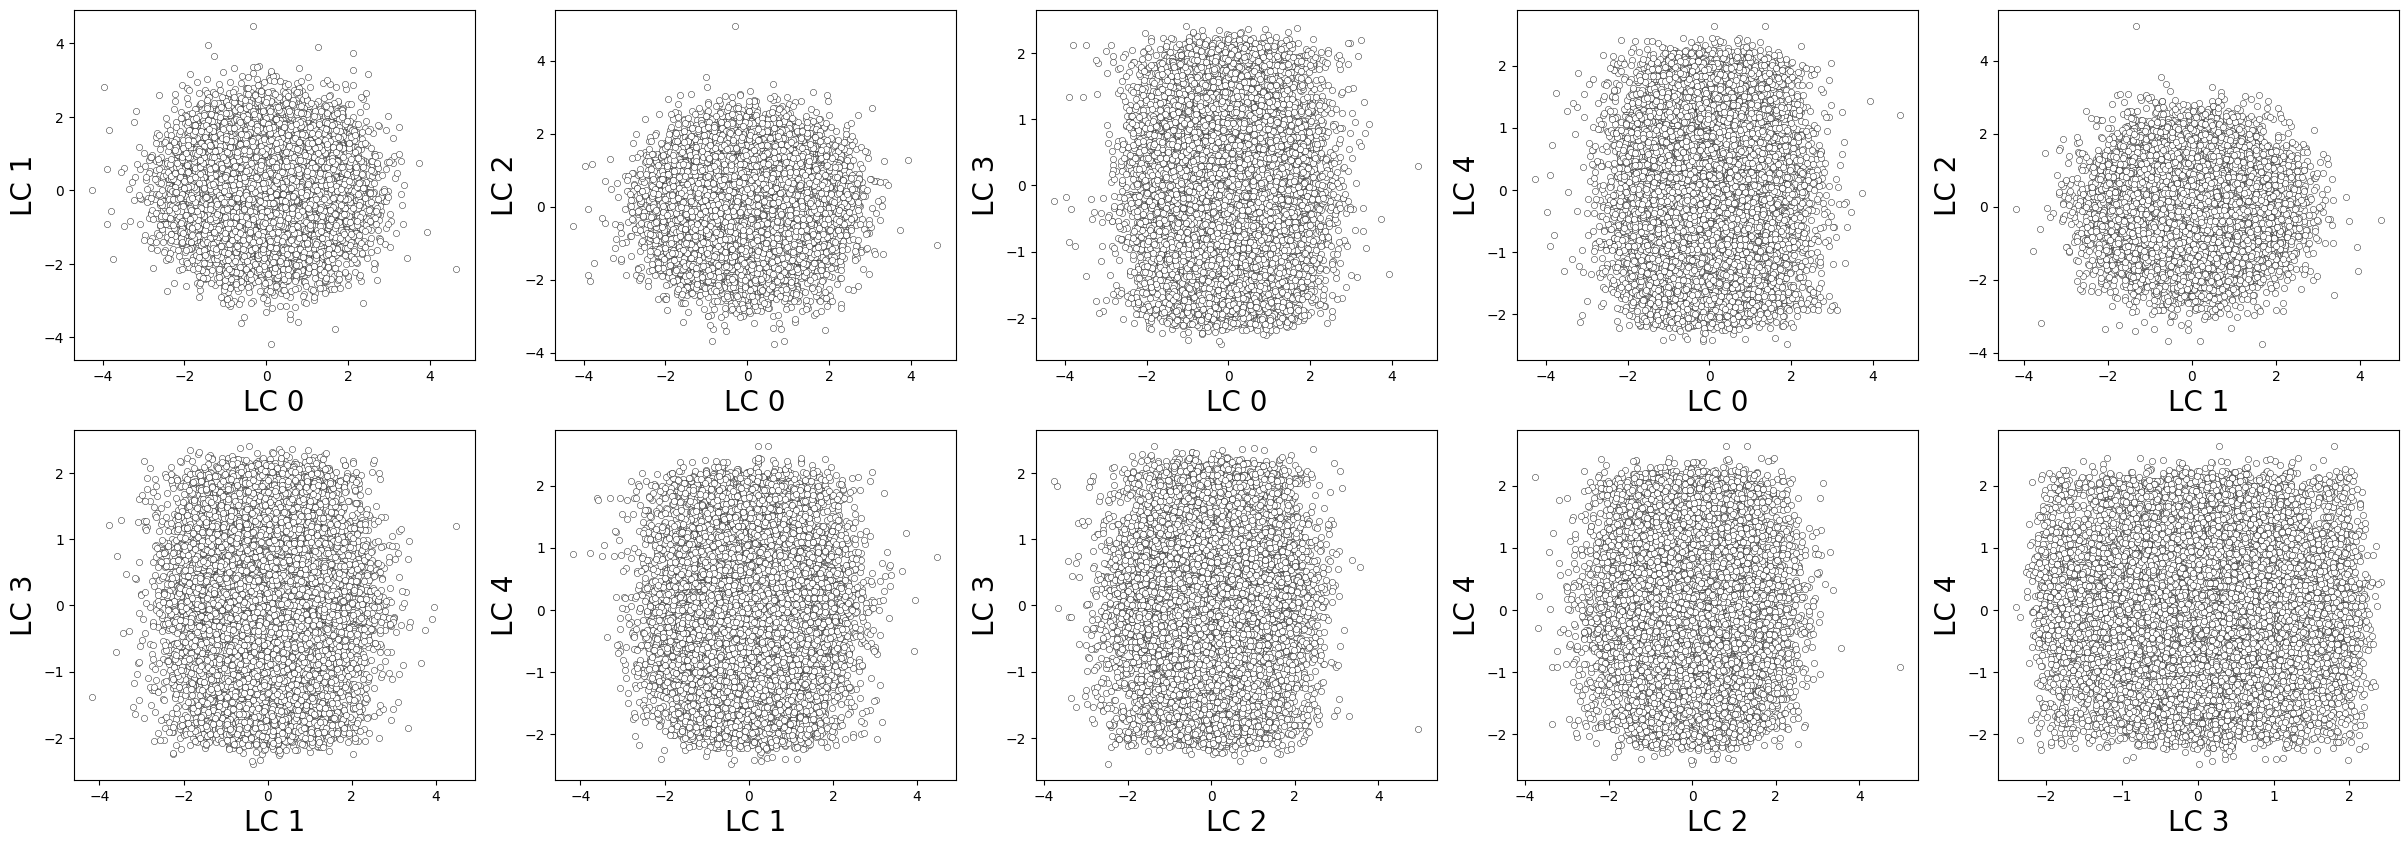

In [4]:
import matplotlib.pyplot as plt
from itertools import combinations


fig, axs = plt.subplots(2, 5, figsize=(30,10))
axs = axs.flatten()
for pairidx, pair in enumerate(list(combinations(range(5), 2))):
    # We only take the two corresponding features
    X_ = Z[:, pair]
    ax = axs[pairidx]
    ax.scatter(
        X_[:, 0], 
        X_[:, 1],
        c='w',
        edgecolor="black",
        linewidth=.3,
        s=20,
    )
    ax.set_xlabel(f"LC {pair[0]}", fontsize=20)
    ax.set_ylabel(f"LC {pair[1]}", fontsize=20)

## Classifier on latent space

In [5]:
import torch
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.inspection import DecisionBoundaryDisplay


def map_label2idx_task0(labels: torch.Tensor) -> torch.Tensor:
        if len(labels.shape) == 1:
            return labels[0]*13 + labels[1]
        else:
            return labels[:,0]*13 + labels[:,1]


In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X, y = dataset[185_000:200_000]

model.to(device)
X = X.to(device)
y = y.to(device)

with torch.no_grad():
    mu, log_var = model.encode(X)
    Z = model.reparameterize(mu, log_var)

Z = Z.cpu()
X = X.cpu()
y = y.cpu()
model.to('cpu')

y_idx = map_label2idx_task0(y)

#### Decision Tree

In [9]:
# [:,[2,3]]
Z_train, Z_test, y_train, y_test = train_test_split(Z, y_idx, test_size=0.2, random_state=42)

clf = RandomForestClassifier()#max_depth=5)
clf.fit(Z_train, y_train)

y_pred = clf.predict(Z_test)

report = classification_report(y_test, y_pred)
# print(report)
print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")

F1 score: 0.8562716198593935


Sample label: tensor([ 3, 12])
Sample prediction: [51]
Sample label idx: 51


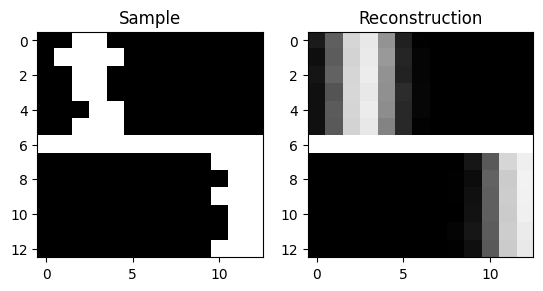

In [10]:
idx = 6

sample = X[idx]
sample_latent = Z[idx]
sample_label = y[idx]
sample_label_idx = y_idx[idx]

sample_pred_idx = clf.predict(sample_latent.reshape(1,-1))

print(f"Sample label: {sample_label}")
print(f"Sample prediction: {sample_pred_idx}")
print(f"Sample label idx: {sample_label_idx}")


in_rec = model.generate(sample.reshape(1,1,13,13), labels=sample_label_idx).squeeze().detach().numpy() # for BVAE

# use this with mnist
# in_ = d[idx][0]
# in_rec = model.generate(in_.reshape(1,*in_.shape)).squeeze().detach().numpy()

in_rec_thrd = np.where(in_rec > 0.5, 1, 0)
fig, axs = plt.subplots(1,2)
axs[0].imshow(sample.squeeze().detach().numpy(), cmap='binary')
axs[0].set_title('Sample')
axs[1].imshow(in_rec, cmap='binary')
axs[1].set_title('Reconstruction')
fig.show()

/tmp/ipykernel_3280092/3502380620.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


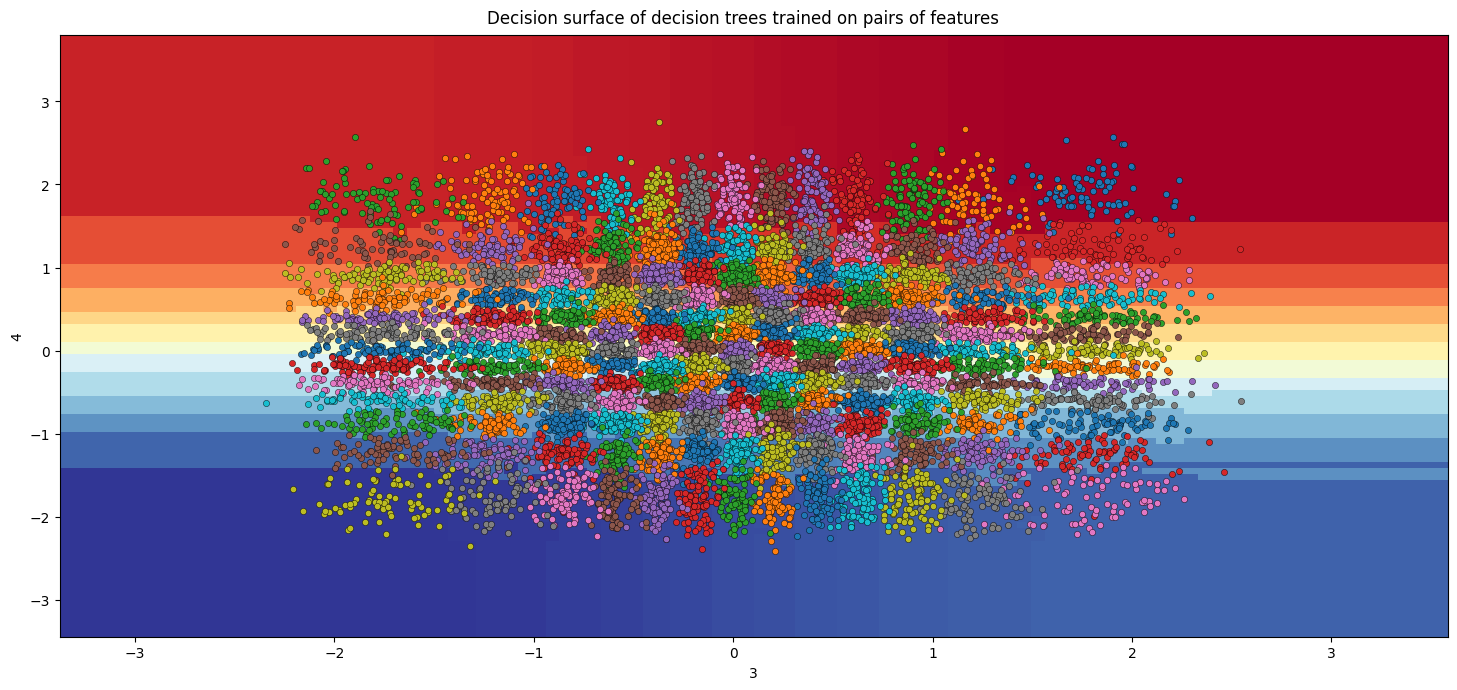

In [13]:
# Parameters
n_classes = 169
plot_colors = matplotlib.cm.get_cmap('Paired')
plot_step = 0.02

feature_names = {
    k:str(k) for k in range(n_classes)
}

plt.figure(figsize=(15, 7))

for pairidx, pair in enumerate([[3,4]]):
    # We only take the two corresponding features
    X_ = Z[:, pair]
    y_ = y_idx

    # Train
    clf_ = RandomForestClassifier().fit(X_, y_)
    #clf_ = RandomForestClassifier().fit(X_, y_)

    # Plot the decision boundary
    ax = plt.subplot(1, 1, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf_,
        X_,
        cmap=plt.cm.RdYlBu,
        grid_resolution=100,
        plot_method="pcolormesh",
        response_method="predict",
        ax=ax,
        xlabel=feature_names[pair[0]],
        ylabel=feature_names[pair[1]],
    )

    # Plot the training points
    for i in range(n_classes):
        idx = np.where(y_ == i)
        plt.scatter(
            X_[idx, 0],
            X_[idx, 1],
            #c=y_[idx],
            cmap=plt.cm.Paired,
            label=feature_names[i],
            edgecolor="black",
            linewidth=.3,
            s=20,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
#plt.legend(loc="upper left", borderpad=0, handletextpad=0)
#remove legend
plt.legend().remove()
_ = plt.axis("tight")
plt.show()

#### MLP: no activation

In [14]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y_idx, test_size=0.2, random_state=42)

clf = MLPClassifier(
    hidden_layer_sizes=(50, 169),
    activation='identity',
    random_state=1,
    )

clf.fit(Z_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(50, 169),
              random_state=1)

In [15]:
y_pred = clf.predict(Z_test)
print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")


F1 score: 0.7087022005978512


/tmp/ipykernel_3280092/2499583983.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


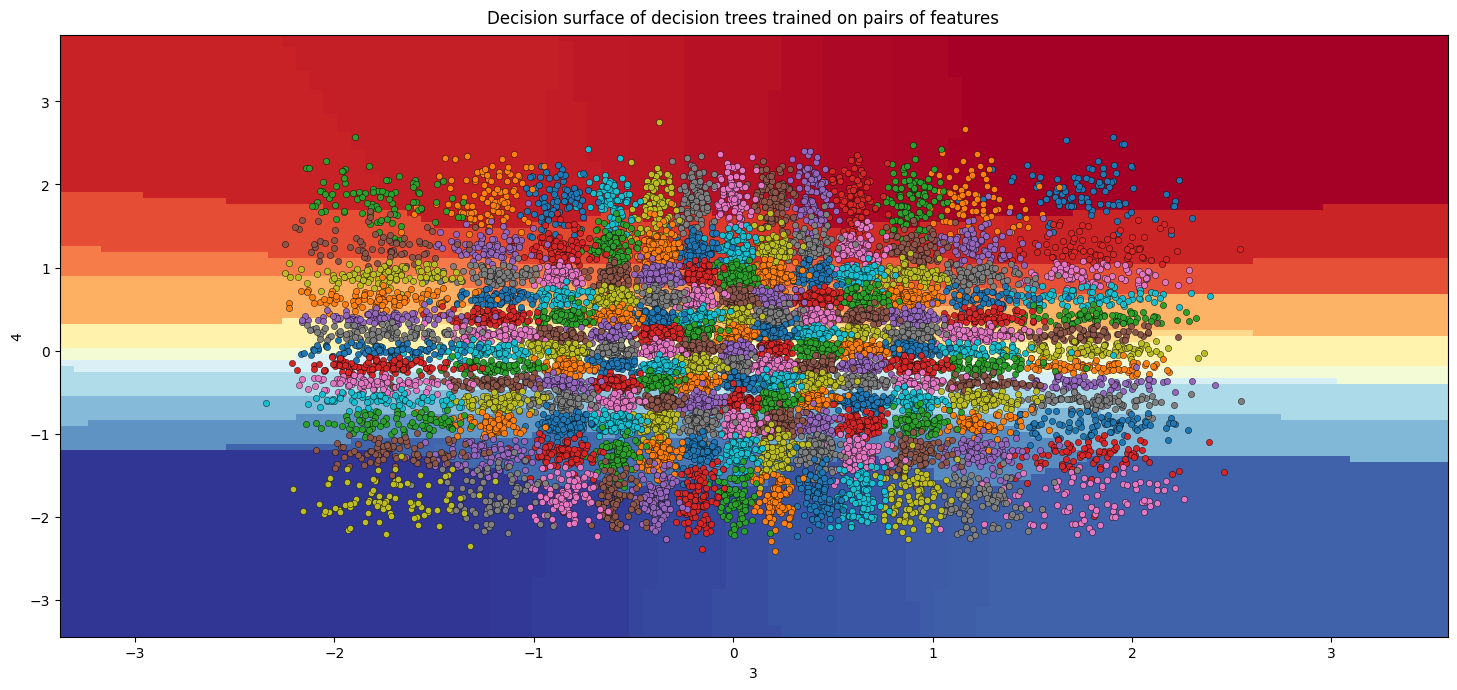

In [16]:
# Parameters
n_classes = 169
plot_colors = matplotlib.cm.get_cmap('Paired')
plot_step = 0.02

feature_names = {
    k:str(k) for k in range(n_classes)
}

plt.figure(figsize=(15, 7))

for pairidx, pair in enumerate([[3,4]]):
    # We only take the two corresponding features
    X_ = Z[:, pair]
    y_ = y_idx

    # Train
    clf_ = MLPClassifier(
    hidden_layer_sizes=(50, 169),
    activation='identity',
    random_state=1,
    )
    clf_.fit(X_, y_)
    # Plot the decision boundary
    ax = plt.subplot(1, 1, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf_,
        X_,
        cmap=plt.cm.RdYlBu,
        grid_resolution=100,
        plot_method="pcolormesh",
        response_method="predict",
        ax=ax,
        xlabel=feature_names[pair[0]],
        ylabel=feature_names[pair[1]],
    )

    # Plot the training points
    for i in range(n_classes):
        idx = np.where(y_ == i)
        plt.scatter(
            X_[idx, 0],
            X_[idx, 1],
            #c=y_[idx],
            cmap=plt.cm.Paired,
            label=feature_names[i],
            edgecolor="black",
            linewidth=.3,
            s=20,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
#plt.legend(loc="upper left", borderpad=0, handletextpad=0)
#remove legend
plt.legend().remove()
_ = plt.axis("tight")
plt.show()

#### MLP: non-linear activation

In [17]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y_idx, test_size=0.2, random_state=42)

clf = MLPClassifier(
    hidden_layer_sizes=(50, 169),
    activation='logistic',
    random_state=1,
    )

clf.fit(Z_train, y_train)

/home/leo/.python-envs/torch-gpu-env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 169),
              random_state=1)

In [18]:
y_pred = clf.predict(Z_test)
print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")


F1 score: 0.8541517550173275


/home/leo/.python-envs/torch-gpu-env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/tmp/ipykernel_3280092/3211825861.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


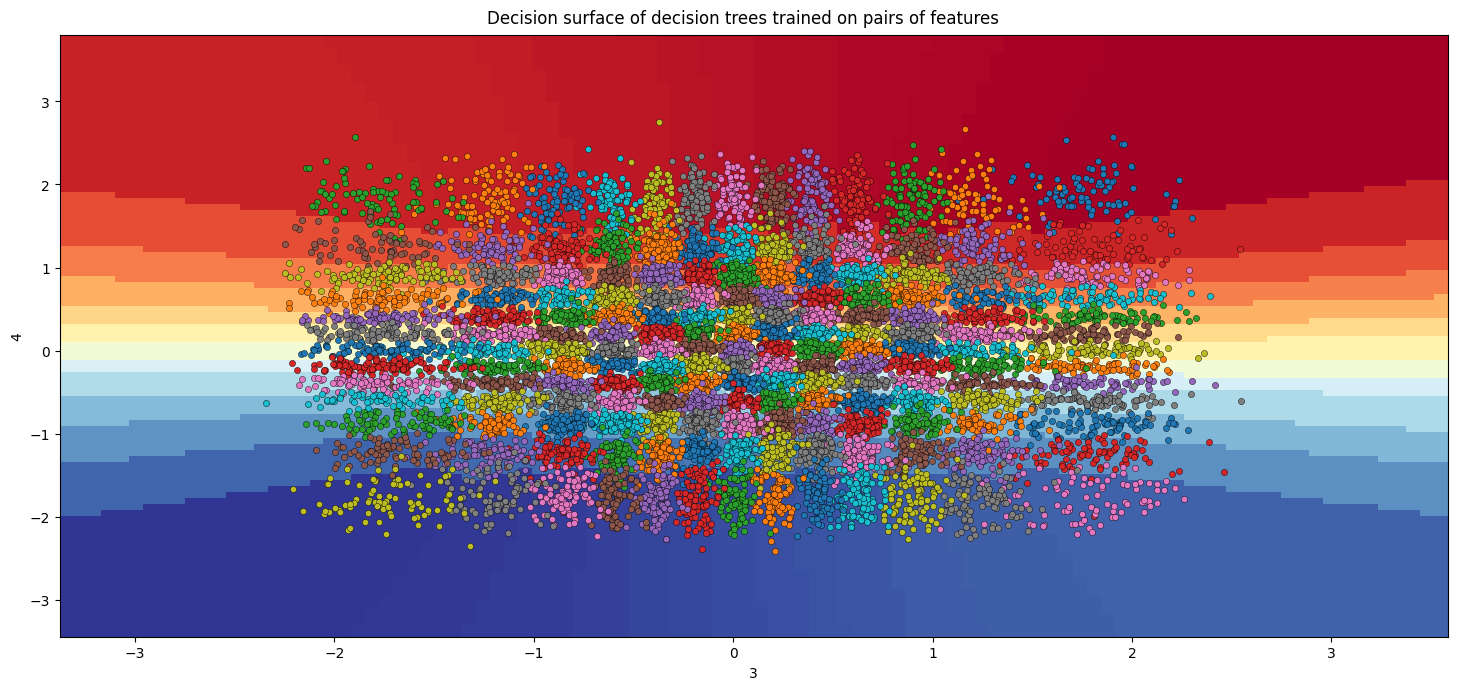

In [19]:
# Parameters
n_classes = 169
plot_colors = matplotlib.cm.get_cmap('Paired')
plot_step = 0.02

feature_names = {
    k:str(k) for k in range(n_classes)
}

plt.figure(figsize=(15, 7))

for pairidx, pair in enumerate([[3,4]]):
    # We only take the two corresponding features
    X_ = Z[:, pair]
    y_ = y_idx

    # Train
    clf_ = MLPClassifier(
    hidden_layer_sizes=(50, 169),
    activation='logistic',
    random_state=1,
    )
    clf_.fit(X_, y_)
    # Plot the decision boundary
    ax = plt.subplot(1, 1, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf_,
        X_,
        cmap=plt.cm.RdYlBu,
        grid_resolution=100,
        plot_method="pcolormesh",
        response_method="predict",
        ax=ax,
        xlabel=feature_names[pair[0]],
        ylabel=feature_names[pair[1]],
    )

    # Plot the training points
    for i in range(n_classes):
        idx = np.where(y_ == i)
        plt.scatter(
            X_[idx, 0],
            X_[idx, 1],
            #c=y_[idx],
            cmap=plt.cm.Paired,
            label=feature_names[i],
            edgecolor="black",
            linewidth=.3,
            s=20,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
#plt.legend(loc="upper left", borderpad=0, handletextpad=0)
#remove legend
plt.legend().remove()
_ = plt.axis("tight")
plt.show()